In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Any dataset that has columns with values as 'Yes' or 'No', strings' values cannot be used.
# However, we can convert them to numerical values as binary.

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Random seed to randomize the dataset.
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3)
df_train.shape

(381, 13)

In [6]:
df_test.shape

(164, 13)

In [7]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_twoBtrain = df_train[num_vars]
df_twoBtest = df_test[num_vars]
df_twoBtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,4500,3,1,2,1,0,0,0,1,0,0,3143000
392,3990,3,1,2,1,0,0,0,0,0,0,3500000
231,4320,3,1,1,1,0,0,0,0,0,1,4690000
271,1905,5,1,2,0,0,1,0,0,0,0,4340000
250,3510,3,1,3,1,0,0,0,0,0,0,4515000


In [9]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_twoBtrain[num_vars] = scaler.fit_transform(df_twoBtrain[num_vars])
df_twoBtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
454,-0.286366,0.073764,-0.58123,0.207401,0.393123,-0.457738,-0.711287,-0.216109,1.422607,-0.82296,-0.564215,-0.868394
392,-0.544762,0.073764,-0.58123,0.207401,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.82296,-0.564215,-0.677628
231,-0.377564,0.073764,-0.58123,-0.937813,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.82296,1.772373,-0.041744
271,-1.601145,2.884176,-0.58123,0.207401,-2.543735,-0.457738,1.405903,-0.216109,-0.702935,-0.82296,-0.564215,-0.228768
250,-0.787958,0.073764,-0.58123,1.352614,0.393123,-0.457738,-0.711287,-0.216109,-0.702935,-0.82296,-0.564215,-0.135256


In [10]:
dataset_train = df_twoBtrain.values[:,:]
print(dataset_train[:20,:])

[[-0.28636589  0.07376409 -0.58122996  0.20740088  0.3931227  -0.45773771
  -0.71128676 -0.21610946  1.42260659 -0.82296013 -0.56421547 -0.86839366]
 [-0.54476182  0.07376409 -0.58122996  0.20740088  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547 -0.67762826]
 [-0.37756445  0.07376409 -0.58122996 -0.93781267  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013  1.77237252 -0.04174357]
 [-1.60114518  2.88417578 -0.58122996  0.20740088 -2.5437351  -0.45773771
   1.40590273 -0.21610946 -0.70293502 -0.82296013 -0.56421547 -0.22876848]
 [-0.78795799  0.07376409 -0.58122996  1.35261443  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547 -0.13525602]
 [-1.35034913  0.07376409 -0.58122996 -0.93781267 -2.5437351  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547 -1.60358858]
 [-0.05330289 -1.33144176 -0.58122996 -0.93781267  0.3931227  -0.45773771
   1.40590273 -0.21610946  1.422

In [11]:
X_train = df_twoBtrain.values[:,0:11]
Y_train = df_twoBtrain.values[:,11]
len(X_train), len(Y_train)

(381, 381)

In [13]:
print('X =', X_train[:5])
print('Y =', Y_train[:5])

X = [[-0.28636589  0.07376409 -0.58122996  0.20740088  0.3931227  -0.45773771
  -0.71128676 -0.21610946  1.42260659 -0.82296013 -0.56421547]
 [-0.54476182  0.07376409 -0.58122996  0.20740088  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547]
 [-0.37756445  0.07376409 -0.58122996 -0.93781267  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013  1.77237252]
 [-1.60114518  2.88417578 -0.58122996  0.20740088 -2.5437351  -0.45773771
   1.40590273 -0.21610946 -0.70293502 -0.82296013 -0.56421547]
 [-0.78795799  0.07376409 -0.58122996  1.35261443  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547]]
Y = [-0.86839366 -0.67762826 -0.04174357 -0.22876848 -0.13525602]


In [15]:
# Convert to 2D array (381x11)
m = len(X_train)
X_1 = X_train.reshape(m,11)
print("X_1 =", X_1[:5,:])

X_1 = [[-0.28636589  0.07376409 -0.58122996  0.20740088  0.3931227  -0.45773771
  -0.71128676 -0.21610946  1.42260659 -0.82296013 -0.56421547]
 [-0.54476182  0.07376409 -0.58122996  0.20740088  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547]
 [-0.37756445  0.07376409 -0.58122996 -0.93781267  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013  1.77237252]
 [-1.60114518  2.88417578 -0.58122996  0.20740088 -2.5437351  -0.45773771
   1.40590273 -0.21610946 -0.70293502 -0.82296013 -0.56421547]
 [-0.78795799  0.07376409 -0.58122996  1.35261443  0.3931227  -0.45773771
  -0.71128676 -0.21610946 -0.70293502 -0.82296013 -0.56421547]]


In [16]:
m = len(X_train)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 381)

In [17]:
X_train = np.hstack((X_0, X_1))
X_train[:5]

array([[ 1.        , -0.28636589,  0.07376409, -0.58122996,  0.20740088,
         0.3931227 , -0.45773771, -0.71128676, -0.21610946,  1.42260659,
        -0.82296013, -0.56421547],
       [ 1.        , -0.54476182,  0.07376409, -0.58122996,  0.20740088,
         0.3931227 , -0.45773771, -0.71128676, -0.21610946, -0.70293502,
        -0.82296013, -0.56421547],
       [ 1.        , -0.37756445,  0.07376409, -0.58122996, -0.93781267,
         0.3931227 , -0.45773771, -0.71128676, -0.21610946, -0.70293502,
        -0.82296013,  1.77237252],
       [ 1.        , -1.60114518,  2.88417578, -0.58122996,  0.20740088,
        -2.5437351 , -0.45773771,  1.40590273, -0.21610946, -0.70293502,
        -0.82296013, -0.56421547],
       [ 1.        , -0.78795799,  0.07376409, -0.58122996,  1.35261443,
         0.3931227 , -0.45773771, -0.71128676, -0.21610946, -0.70293502,
        -0.82296013, -0.56421547]])

In [21]:
theta = np.zeros((12,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [22]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m

theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [23]:
cost = compute_loss(X_train, Y_train, theta)
print("Cost loss for all given theta =", cost)

Cost loss for all given theta = 190.49999999999997


In [24]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta)
    return theta, loss_history

In [25]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.003

In [26]:
theta, loss_history = gradient_descent(X_train, Y_train, theta, alpha, iterations)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [1.72425503e-16 2.63927211e-01 6.96052773e-02 2.44898488e-01
 1.93390557e-01 9.48314563e-02 8.68734541e-02 8.87721979e-02
 1.35441505e-01 2.30123277e-01 1.20465078e-01 1.63378441e-01]
loss_history = [0.49561806 0.49129684 0.4870355  ... 0.17518038 0.17518013 0.17517988]


In [28]:
df_twoBtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,4000,3,1,2,1,0,0,0,0,1,0,4585000
113,9620,3,1,1,1,0,1,0,0,2,1,6083000
325,3460,4,1,2,1,0,0,0,1,0,0,4007500
66,13200,2,1,1,1,0,1,1,0,1,0,6930000
479,3660,4,1,2,0,0,0,0,0,0,0,2940000


In [30]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_twoBtest[num_vars] = scaler.fit_transform(df_twoBtest[num_vars])
df_twoBtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,-0.528409,-0.007694,-0.550215,0.265241,0.434057,-0.482786,-0.789786,-0.226455,-0.624364,0.442615,-0.530330,-0.095841
113,1.673306,-0.007694,-0.550215,-0.910424,0.434057,-0.482786,1.266165,-0.226455,-0.624364,1.652428,1.885618,0.708470
325,-0.739961,1.254180,-0.550215,0.265241,0.434057,-0.482786,-0.789786,-0.226455,1.601630,-0.767199,-0.530330,-0.405914
66,3.075822,-1.269569,-0.550215,-0.910424,0.434057,-0.482786,1.266165,4.415880,-0.624364,0.442615,-0.530330,1.163244
479,-0.661608,1.254180,-0.550215,0.265241,-2.303843,-0.482786,-0.789786,-0.226455,-0.624364,-0.767199,-0.530330,-0.979079


In [31]:
dataset_test = df_twoBtest.values[:,:]
print(dataset_test[:20,:])

[[-0.52840866 -0.00769436 -0.55021459  0.26524149  0.43405737 -0.4827864
  -0.78978629 -0.22645541 -0.62436408  0.44261462 -0.53033009 -0.09584075]
 [ 1.67330604 -0.00769436 -0.55021459 -0.91042351  0.43405737 -0.4827864
   1.26616531 -0.22645541 -0.62436408  1.65242793  1.88561808  0.70846983]
 [-0.73996132  1.25418015 -0.55021459  0.26524149  0.43405737 -0.4827864
  -0.78978629 -0.22645541  1.6016296  -0.76719868 -0.53033009 -0.40591375]
 [ 3.07582182 -1.26956887 -0.55021459 -0.91042351  0.43405737 -0.4827864
   1.26616531  4.41588043 -0.62436408  0.44261462 -0.53033009  1.16324356]
 [-0.66160849  1.25418015 -0.55021459  0.26524149 -2.30384294 -0.4827864
  -0.78978629 -0.22645541 -0.62436408 -0.76719868 -0.53033009 -0.97907899]
 [ 0.39223717 -0.00769436  1.29131996  1.44090649  0.43405737  2.07130939
  -0.78978629 -0.22645541  1.6016296  -0.76719868 -0.53033009  0.7686052 ]
 [-0.58717329 -0.00769436 -0.55021459 -0.91042351  0.43405737 -0.4827864
  -0.78978629 -0.22645541 -0.62436408 

In [37]:
X_test = df_twoBtest.values[:,0:11]
Y_test = df_twoBtest.values[:,11]
len(X_test), len(Y_test)

(164, 164)

In [38]:
print('X =', X_test[:5])
print('Y =', Y_test[:5])

X = [[-0.52840866 -0.00769436 -0.55021459  0.26524149  0.43405737 -0.4827864
  -0.78978629 -0.22645541 -0.62436408  0.44261462 -0.53033009]
 [ 1.67330604 -0.00769436 -0.55021459 -0.91042351  0.43405737 -0.4827864
   1.26616531 -0.22645541 -0.62436408  1.65242793  1.88561808]
 [-0.73996132  1.25418015 -0.55021459  0.26524149  0.43405737 -0.4827864
  -0.78978629 -0.22645541  1.6016296  -0.76719868 -0.53033009]
 [ 3.07582182 -1.26956887 -0.55021459 -0.91042351  0.43405737 -0.4827864
   1.26616531  4.41588043 -0.62436408  0.44261462 -0.53033009]
 [-0.66160849  1.25418015 -0.55021459  0.26524149 -2.30384294 -0.4827864
  -0.78978629 -0.22645541 -0.62436408 -0.76719868 -0.53033009]]
Y = [-0.09584075  0.70846983 -0.40591375  1.16324356 -0.97907899]


In [40]:
# Convert to 2D array (164x11)
m = len(X_test)
X_1 = X_test.reshape(m,11)
print("X_1 =", X_1[:5,:])

X_1 = [[-0.52840866 -0.00769436 -0.55021459  0.26524149  0.43405737 -0.4827864
  -0.78978629 -0.22645541 -0.62436408  0.44261462 -0.53033009]
 [ 1.67330604 -0.00769436 -0.55021459 -0.91042351  0.43405737 -0.4827864
   1.26616531 -0.22645541 -0.62436408  1.65242793  1.88561808]
 [-0.73996132  1.25418015 -0.55021459  0.26524149  0.43405737 -0.4827864
  -0.78978629 -0.22645541  1.6016296  -0.76719868 -0.53033009]
 [ 3.07582182 -1.26956887 -0.55021459 -0.91042351  0.43405737 -0.4827864
   1.26616531  4.41588043 -0.62436408  0.44261462 -0.53033009]
 [-0.66160849  1.25418015 -0.55021459  0.26524149 -2.30384294 -0.4827864
  -0.78978629 -0.22645541 -0.62436408 -0.76719868 -0.53033009]]


In [41]:
# Create theta zero.
m = len(X_test)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 164)

In [42]:
X_test = np.hstack((X_0, X_1))
X_test[:5]

array([[ 1.        , -0.52840866, -0.00769436, -0.55021459,  0.26524149,
         0.43405737, -0.4827864 , -0.78978629, -0.22645541, -0.62436408,
         0.44261462, -0.53033009],
       [ 1.        ,  1.67330604, -0.00769436, -0.55021459, -0.91042351,
         0.43405737, -0.4827864 ,  1.26616531, -0.22645541, -0.62436408,
         1.65242793,  1.88561808],
       [ 1.        , -0.73996132,  1.25418015, -0.55021459,  0.26524149,
         0.43405737, -0.4827864 , -0.78978629, -0.22645541,  1.6016296 ,
        -0.76719868, -0.53033009],
       [ 1.        ,  3.07582182, -1.26956887, -0.55021459, -0.91042351,
         0.43405737, -0.4827864 ,  1.26616531,  4.41588043, -0.62436408,
         0.44261462, -0.53033009],
       [ 1.        , -0.66160849,  1.25418015, -0.55021459,  0.26524149,
        -2.30384294, -0.4827864 , -0.78978629, -0.22645541, -0.62436408,
        -0.76719868, -0.53033009]])

In [43]:
theta_test = np.zeros((12,1))
theta_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [44]:
cost_test = compute_loss(X_test, Y_test, theta_test)
print("Cost loss for all given theta =", cost_test)

Cost loss for all given theta = 82.00000000000001


In [45]:
theta_test = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.003

In [46]:
theta_test, loss_history_test = gradient_descent(X_test, Y_test, theta_test, alpha, iterations)
print("Final value of theta =", theta_test)
print("loss_history =", loss_history_test)

Final value of theta = [2.79451259e-17 3.16562524e-01 3.65194826e-02 3.09184204e-01
 2.11196152e-01 9.36746124e-02 2.51968537e-02 1.13074814e-01
 2.90510869e-02 2.11399032e-01 1.76858847e-01 9.74350424e-02]
loss_history = [0.49481048 0.48969554 0.4846541  ... 0.12716352 0.12716301 0.12716251]


Text(0.5, 1.0, 'Convergence of gradient descent')

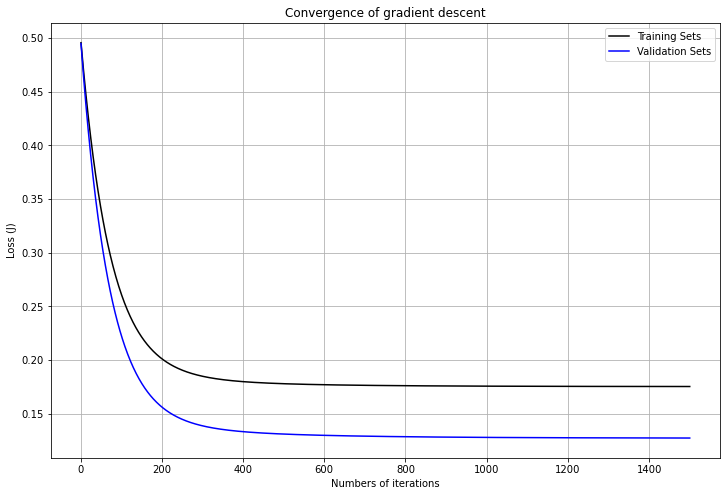

In [48]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.plot(range(1, iterations + 1), loss_history_test, color = 'blue')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.legend(['Training Sets', 'Validation Sets'])
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent")